<a href="https://colab.research.google.com/github/Katsushi-Nakanishi/quant-macro/blob/main/HPfilter_France%26Japan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Standard deviation of the cycle in France:0.0193
Standard deviation of the cycle in Japan:0.0160
Correlation coefficient matrix of the cycle in France and japan:
[[1.        0.6555206]
 [0.6555206 1.       ]]


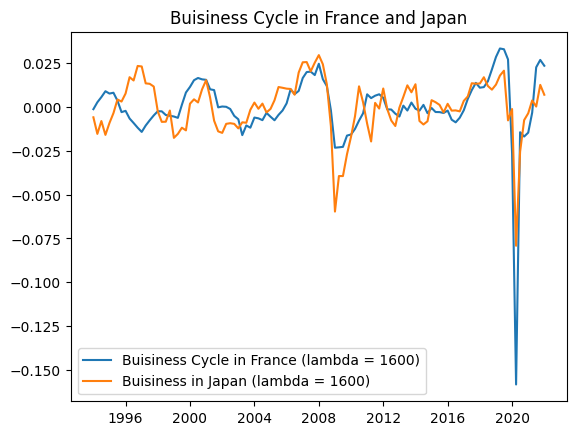

In [14]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas_datareader as pdr
import numpy as np

# set the start and end dates for the data
start_date = '1994-01-01'
end_date = '2022-01-01'

# download the data from FRED using pandas_datareader
gdp_france = web.DataReader('CLVMNACSCAB1GQFR', 'fred', start_date, end_date)
gdp_japan = web.DataReader('JPNRGDPEXP', 'fred', start_date, end_date)
log_gdp_france = np.log(gdp_france)
log_gdp_japan = np.log(gdp_japan)

# apply a Hodrick-Prescott filter to the data to extract the cyclical component
fcycle_1600, ftrend_1600 = sm.tsa.filters.hpfilter(log_gdp_france, lamb=1600)
jcycle_1600, jtrend_1600 = sm.tsa.filters.hpfilter(log_gdp_japan, lamb=1600)

# calculate the Standard deviation and Correlation coefficient
std_fcycle = np.std(fcycle_1600)
std_jcycle = np.std(jcycle_1600)
corr_cycle = np.corrcoef(fcycle_1600, jcycle_1600)
print(f"Standard deviation of the cycle in France:{std_fcycle:.4f}")
print(f"Standard deviation of the cycle in Japan:{std_jcycle:.4f}")
print(f"Correlation coefficient matrix of the cycle in France and japan:\n{corr_cycle}")

# Plot the trend component
plt.plot(fcycle_1600, label="Buisiness Cycle in France (lambda = 1600)")
plt.plot(jcycle_1600, label="Buisiness in Japan (lambda = 1600)")

# Add a legend and show the plot
plt.legend()
plt.title('Buisiness Cycle in France and Japan')
plt.show()
